# Content
    1.Import libraries
    2.Load dataset
    3.Exploratory data analysis
        3.1.Check for missing values
        3.2.Check for outliers
        3.3.Visualizations 
    4.Data preparation
        4.1.Feature scaling 
        4.2.Label encoding
    5.K_Means clustering



# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Load dataset 

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.drop(['CustomerID'], axis = 1, inplace = True)

# Exploratory Data Analysis

### Check for missing values

In [7]:
df.isna().any()

Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### Check for outliers

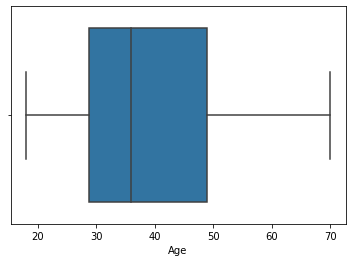

In [8]:
sns.boxplot(x = df['Age'])

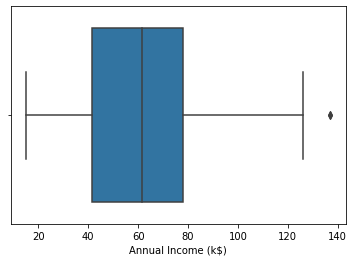

In [9]:
sns.boxplot(x = df['Annual Income (k$)'])

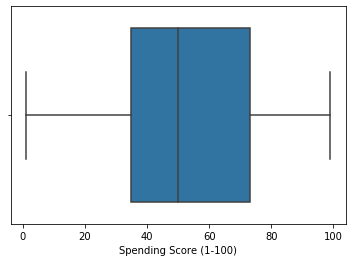

In [10]:
sns.boxplot(x = df['Spending Score (1-100)'])

There are few outliers in the "Annual Income (k$)" feature.

### Visualizations 

#### Customer gender visualization

Text(0.5, 1.0, 'Customer gender plot')

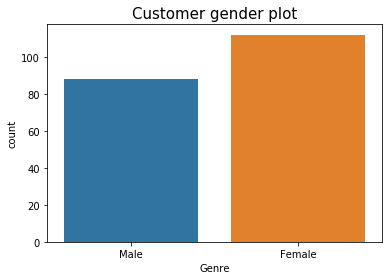

In [11]:
sns.countplot(df['Genre'])
plt.title('Customer gender plot', fontsize = 15)

From this barplot, we can see that the number of females is higher than the males.

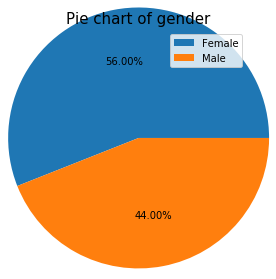

In [12]:
labels = ['Female', 'Male']
plt.pie(df['Genre'].value_counts(), autopct = '%0.2f%%', radius = 1.5)
plt.title('Pie chart of gender', fontsize = 15)
plt.legend(labels = labels)

From this pie chart, we conclude that the percentage of females is 56%, the percentage of males is 44%.

#### Visualization of age distribution

Text(0.5, 1.0, 'Age distribution plot')

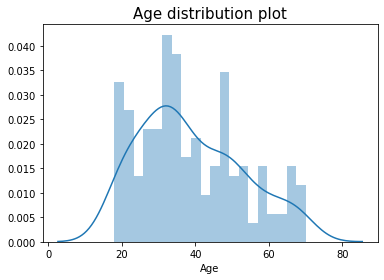

In [13]:
sns.distplot(df['Age'], bins = 20)
plt.title('Age distribution plot', fontsize = 15)

From this visualization, we conclude that most of the customers are between 30 and 35 years of age. The minimum age is 18 and the maximum age is 70. The average age is 39.  

#### Visualization of Annual Income distribution

Text(0.5, 1.0, 'Annual Income distribution plot')

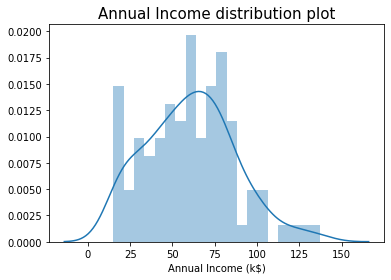

In [14]:
sns.distplot(df['Annual Income (k$)'], bins = 20)
plt.title('Annual Income distribution plot', fontsize = 15)

From this histogram, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137. The average annual income is 60.5. The annual income has a normal distribution.

#### Visualization of Spending Score distribution

Text(0.5, 1.0, 'Spending Score distribution plot')

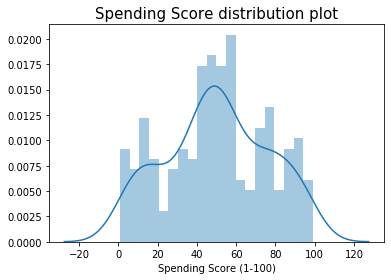

In [15]:
sns.distplot(df['Spending Score (1-100)'], bins = 20)
plt.title('Spending Score distribution plot', fontsize = 15)

From this histogram, we conclude that most of the customers spending score is between 40 and 60. The minimum spending score is 1 and the maximum is 99. The average score is 50. 

#### Relationships between variables

Text(0.5, 1.0, 'Relationship between Age and Annual Income')

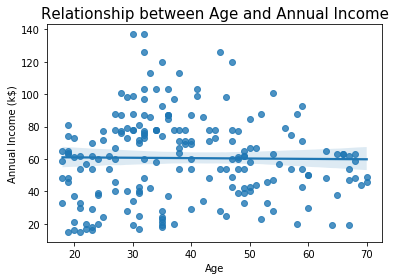

In [16]:
sns.regplot(x = 'Age', y = 'Annual Income (k$)', data = df)
plt.title('Relationship between Age and Annual Income', fontsize = 15)

There is no relationship between Age and Annual Income.

Text(0.5, 1.0, 'Relationship between Age and Spending Score (1-100)')

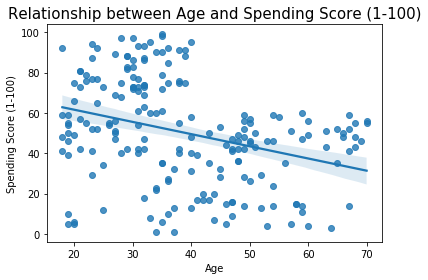

In [17]:
sns.regplot(x = 'Age', y = 'Spending Score (1-100)', data = df)
plt.title('Relationship between Age and Spending Score (1-100)', fontsize = 15)

There is a weak negative correlation between Age and Spending Score.

Text(0.5, 1.0, 'Relationship between Annual Income and Spending Score (1-100)')

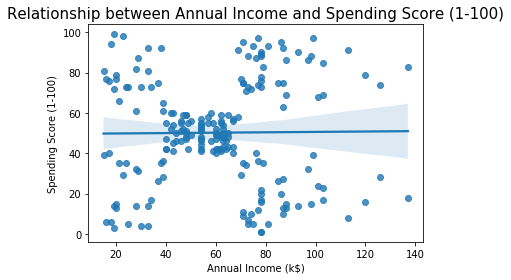

In [18]:
sns.regplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.title('Relationship between Annual Income and Spending Score (1-100)', fontsize = 15)

There is no relationship between Annual Income and Spending Score.

Text(0.5, 1, 'Numeric data correlations')

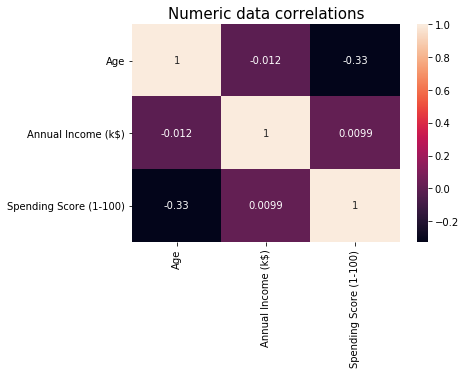

In [19]:
sns.heatmap(df.corr(), annot = True)
plt.title('Numeric data correlations', fontsize = 15)

From this heatmap, we conclude that there aren't strong relationships between the customer age, annual income and spending score.

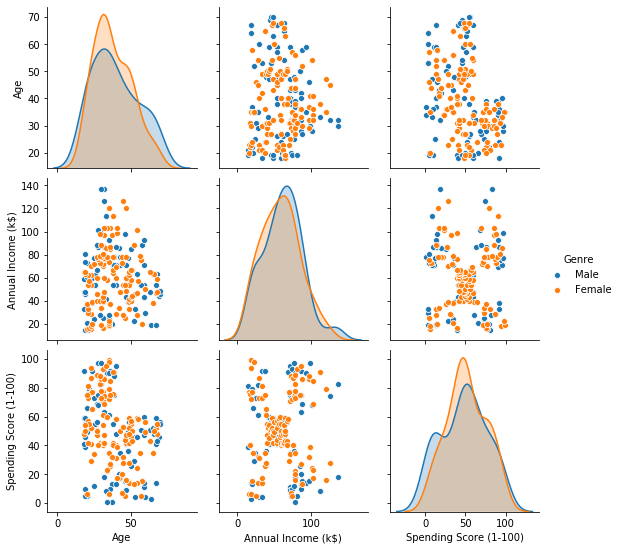

In [20]:
sns.pairplot(df, hue = 'Genre')

From this plot, we conclude that genre has very low effect on other vairables.

# Data preparation

### Feature scaling 

In [21]:
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(df.drop(['Genre'], axis = 1)) 
df.loc[:, 1:] = df_scaled
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.424569,-1.738999,-0.434801
1,Male,-1.281035,-1.738999,1.195704
2,Female,-1.352802,-1.700830,-1.715913
3,Female,-1.137502,-1.700830,1.040418
4,Female,-0.563369,-1.662660,-0.395980


### Label encoding

In [22]:
label_encoder = LabelEncoder()
df_encoded = label_encoder.fit_transform(df['Genre'])
df['Genre'] = df_encoded
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


# K_Means clustering

In [23]:
df_1 = df.iloc[:, [1, 2]].values # Age and Annual Income
df_2 = df.iloc[:, [1, 3]].values # Age and Spending Score
df_3 = df.iloc[:, [2, 3]].values # Annual Income and Spending Score

#### Segmentation using Age and Annual Income

In [24]:
sum_of_squares = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    clusters = kmeans.fit(df_1)
    sum_of_squares.append(kmeans.inertia_)

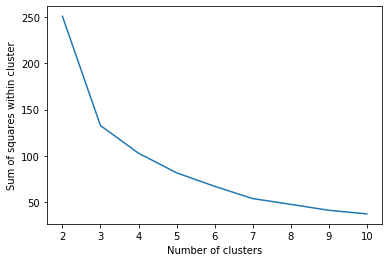

In [25]:
plt.plot(range(2, 11), sum_of_squares)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares within cluster')
plt.show()

From the above graph, we conclude that the appropriate number of clusters is 3.

In [26]:
kmeans_1 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans_1.fit_predict(df_1)

In [27]:
kmeans_1.cluster_centers_

array([[-0.27913465,  0.96851913],
       [-0.87474334, -0.83093616],
       [ 1.2169084 , -0.35628084]])

In [28]:
print(metrics.silhouette_score(df_1, clusters))

0.4431419612216489


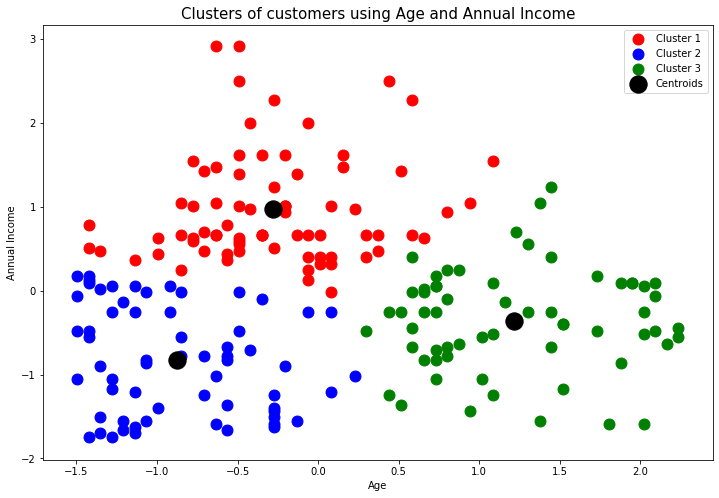

In [29]:
plt.figure(figsize = (12, 8))

plt.scatter(df_1[clusters == 0, 0], df_1[clusters == 0, 1], 
            s = 120, c = 'red', label = 'Cluster 1')
plt.scatter(df_1[clusters == 1, 0], df_1[clusters == 1, 1], 
            s = 120, c = 'blue', label = 'Cluster 2')
plt.scatter(df_1[clusters == 2, 0], df_1[clusters == 2, 1], 
            s = 120, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], 
            s = 300, c = 'black', label = 'Centroids')

plt.title("Clusters of customers using Age and Annual Income", fontsize = 15)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.legend(loc = 0)
plt.show()

#### Segmentation using Age and Spending Score

In [30]:
sum_of_squares = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    clusters = kmeans.fit(df_2)
    sum_of_squares.append(kmeans.inertia_)

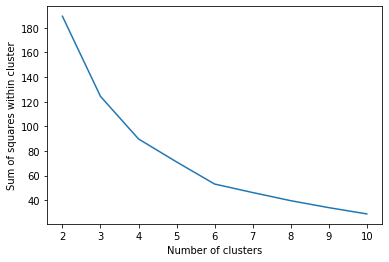

In [31]:
plt.plot(range(2, 11), sum_of_squares)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares within cluster')
plt.show()

From the above graph, we conclude that the appropriate number of clusters is 4.

In [32]:
kmeans_2 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans_2.fit_predict(df_2)

In [33]:
kmeans_2.cluster_centers_

array([[ 0.62833625, -1.36651894],
       [-0.61415725,  1.14971545],
       [ 1.22927178, -0.06558366],
       [-0.8346466 , -0.39442706]])

In [34]:
print(metrics.silhouette_score(df_2, clusters))

0.4383860846564479


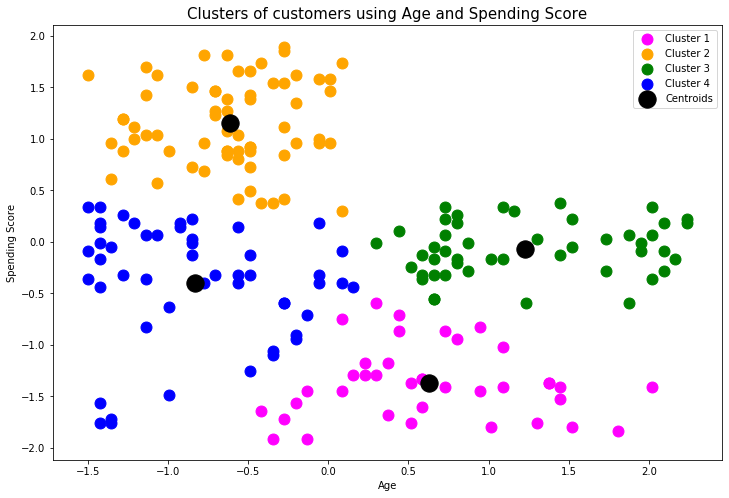

In [35]:
plt.figure(figsize = (12, 8))

plt.scatter(df_2[clusters == 0, 0], df_2[clusters == 0, 1], 
            s = 120, c = 'magenta', label = 'Cluster 1')
plt.scatter(df_2[clusters == 1, 0], df_2[clusters == 1, 1], 
            s = 120, c = 'orange', label = 'Cluster 2')
plt.scatter(df_2[clusters == 2, 0], df_2[clusters == 2, 1], 
            s = 120, c = 'green', label = 'Cluster 3')
plt.scatter(df_2[clusters == 3, 0], df_2[clusters == 3, 1], 
            s = 120, c = 'blue', label = 'Cluster 4')

plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], 
            s = 300, c = 'black', label = 'Centroids')

plt.title("Clusters of customers using Age and Spending Score", fontsize = 15)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend(loc = 0)
plt.show()

#### Segmentation using Annual Income and Spending Score

In [36]:
sum_of_squares = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    clusters = kmeans.fit(df_3)
    sum_of_squares.append(kmeans.inertia_)

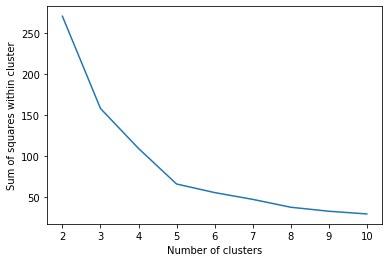

In [37]:
plt.plot(range(2, 11), sum_of_squares)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares within cluster')
plt.show()

From the above graph, we conclude that the appropriate number of clusters is 5.

In [38]:
kmeans_3 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans_3.fit_predict(df_3)

In [39]:
kmeans_3.cluster_centers_

array([[-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275]])

In [40]:
print(metrics.silhouette_score(df_3, clusters))

0.5546571631111091


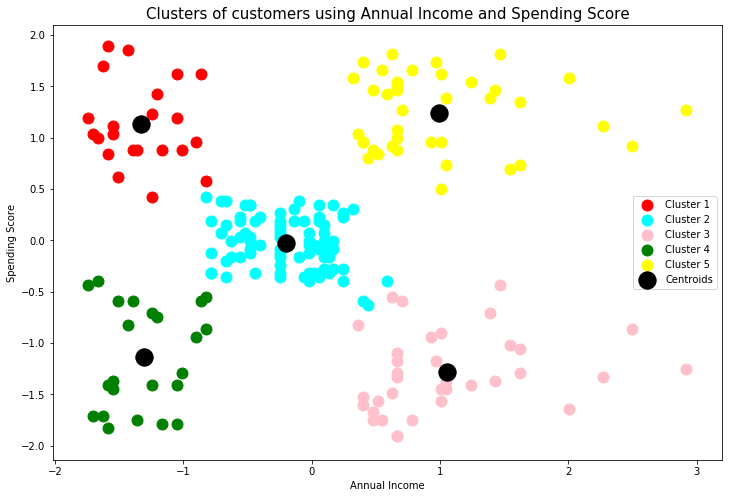

In [41]:
plt.figure(figsize = (12, 8))

plt.scatter(df_3[clusters == 0, 0], df_3[clusters == 0, 1], 
            s = 120, c = 'red', label = 'Cluster 1')
plt.scatter(df_3[clusters == 1, 0], df_3[clusters == 1, 1], 
            s = 120, c = 'cyan', label = 'Cluster 2')
plt.scatter(df_3[clusters == 2, 0], df_3[clusters == 2, 1], 
            s = 120, c = 'pink', label = 'Cluster 3')
plt.scatter(df_3[clusters == 3, 0], df_3[clusters == 3, 1], 
            s = 120, c = 'green', label = 'Cluster 4')
plt.scatter(df_3[clusters == 4, 0], df_3[clusters == 4, 1], 
            s = 120, c = 'yellow', label = 'Cluster 5')

plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], 
            s = 300, c = 'black', label = 'Centroids')

plt.title("Clusters of customers using Annual Income and Spending Score", fontsize = 15)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(loc = 0)
plt.show()

#### Segmentation using Genre, Age, Annual Income and Spending Score

In [42]:
sum_of_squares = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(df)
    sum_of_squares.append(kmeans.inertia_)
    clusters = kmeans.predict(df)
    silhouette_avg = metrics.silhouette_score(df, clusters)
    print("n_clusters =", i, "\nThe average silhouette_score =", silhouette_avg, "\n")
    

n_clusters = 2 
The average silhouette_score = 0.3031976564160757 

n_clusters = 3 
The average silhouette_score = 0.3142800845203406 

n_clusters = 4 
The average silhouette_score = 0.35044061449694197 

n_clusters = 5 
The average silhouette_score = 0.34977050035201074 

n_clusters = 6 
The average silhouette_score = 0.356485834425401 

n_clusters = 7 
The average silhouette_score = 0.344148182302797 

n_clusters = 8 
The average silhouette_score = 0.32762739946154457 

n_clusters = 9 
The average silhouette_score = 0.33806870684888823 

n_clusters = 10 
The average silhouette_score = 0.32385105283081594 



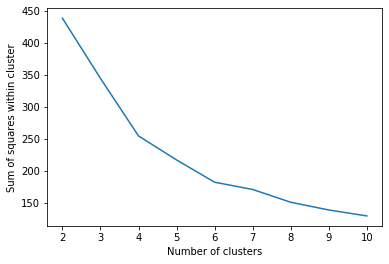

In [43]:
plt.plot(range(2, 11), sum_of_squares)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares within cluster')
plt.show()

From the above graph and silhouette scores, we conclude that the appropriate number of clusters is 6.

In [44]:
kmeans_4 = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans_4.fit_predict(df)

In [45]:
kmeans_4.cluster_centers_

array([[ 0.43478261, -0.99396865, -1.34734766,  1.06404834],
       [ 0.42222222,  1.25472096, -0.24021294, -0.04399777],
       [ 0.34210526, -0.85043527, -0.14894113, -0.04147777],
       [ 0.38095238,  0.47895722, -1.30822992, -1.19644353],
       [ 0.58823529,  0.17329545,  1.06645385, -1.2980103 ],
       [ 0.46153846, -0.44191719,  0.99158305,  1.23950275]])

In [46]:
print(metrics.silhouette_score(df, clusters))

0.356485834425401


We got the maximum silhouette score by using the Annual Income and Spending Score features and setting n_clusters = 5. We observe that there is a distribution of 5 clusters as follows:

    Cluster 1 - customers who have a low annual income but high spending score.
    Cluster 2 - customers who have a medium annual income and medium spending score.
    Cluster 3 - customers who have a high annual income but low spending score.
    Cluster 4 - customers who have a low annual income and low spending score.
    Cluster 5 - customers who have a high annual income and high spending score.

